# **1. Data Exploration**

## **1.1 Data Preprocessing:**
Goal: Clean and prepare raw data to remove inconsistencies, handle missing values, and make the dataset ready for analysis and visualization.

In [16]:
# Importing Python Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#Reading Dataset
df = pd.read_csv('../Data/bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
# Exploring how many variables (columns) and rows your dataset contains
df.shape

(45211, 17)

Our dataset contains **17 variables** and **45,211 rows**, which provides a sufficient amount of data to build a reliable predictive model.

In [28]:
# Exploring the data completeness and Dtype of our variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


All columns contain 45,211 non-null values, meaning there are **no missing values in any column**. This ensures data completeness, which is a positive aspect since no immediate imputation or removal of rows is necessary.

**7 columns are of data type int64 (integer)**. These columns are numerical and likely represent continuous or discrete variables.

**10 columns are of data type object**. These are categorical variables and may need to be encoded into numerical values if we are going to use them as features in our machine learning model.

In [53]:
# Get descriptive statistics for numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Key Insights:**

Age: The average client age is 41 years, with a range from 18 to 95.

Balance: The average balance is €1362, with a large variability (std = €3044), and 50% of clients have a balance of less than €448.

Duration: The average call duration is 258 seconds (~4.3 minutes).

Campaign: Most clients were contacted between 1 and 3 times.

**Possible Outliers:** (to investigate)

Balance: A minimum balance of -€8019 (overdrafts) and a maximum balance of €102,127, indicating a few extreme values.

Duration: Calls as short as 0 seconds and as long as 4918 seconds (~82 minutes), suggesting potential outliers.

Campaign: Some clients were contacted up to 63 times, which is unusually high.

**Next Steps to dispatch between the team members:**

task 1: Outlier Detection and Handling : Jakub

task 2: Data Type Conversion : Convert categorical variables to numerical codes : Lareina

task 3: Standardization of our variables : scaling : Lareina

task 4: Univariate Analysis: Histograms, box plots, and bar charts for variables :Yihan

task 5: Multivariate Analysis : Explore interactions between variables : Correlation, trends, vizualisation: Yasmine

task 6: Features selection : with features we will choose to predict our target variable : Yasmine

task 7: Split Data between Train and Test : Amina

task 8: Try KNN algorithm and evaluate its performance, if the accuracy is hight, create the Confusion matrix to calculate the other scores (Precision and Recall) : Amina

task 9: if the model predict well, we can say that we finished the work :) if not we can try another ML model.

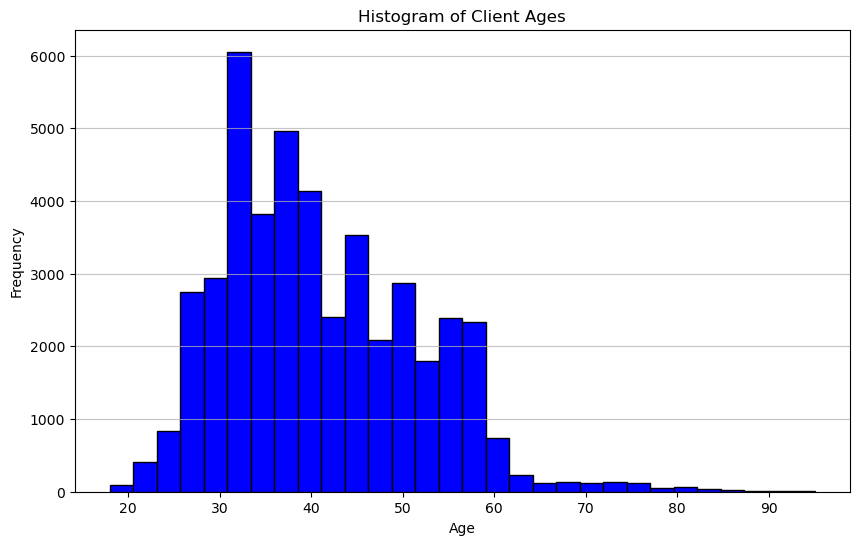

In [54]:
# Distribution of client ages

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Client Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


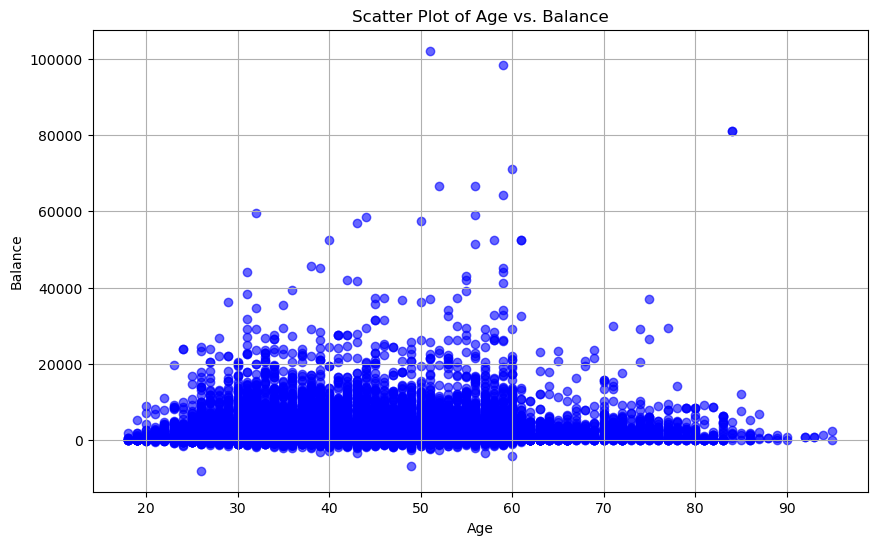

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['balance'], color='blue', alpha=0.6)
plt.title('Scatter Plot of Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.grid()
plt.show()